
# Part I - (Dataset Exploration Title)
## by Zeyad Khaled Abouelyazid Elbosttamy Hammad

## Introduction

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

## Preliminary Wrangling

In [107]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
df = pd.read_csv("C:\\Users\\Al-arab\\Desktop\\Deci project\\201902-fordgobike-tripdata.csv")

### What is the structure of your dataset?

>It is a Dataset with 16 variable (column) and about 183000 observations (raw) by using .shape() 7 of them is object and the rest is numerical
with some nans and no duplicates by using .info() and .duplicated() to find duplicates and .isna().sum() to find some nans There are some data type recorded wrongly by .info()


### What is/are the main feature(s) of interest in your dataset?
> 1. The time the trip takes from users in column "duration_sec" 
> 2. there are 4 start_station_longtitude, start_station_latitude , end_station_longtitude, end_station_latitude columns can be used to get the displacement of trip by (end latit - start latit)^2 + (end long - start long)^2 then under square root
> 3. user type either customer or subscriber an member_gender either male or female
> 4. User type and member_birth_year (to get member age) and member_gender column is very important to know who are the main users

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> knowing the bigest market
> Type of user either or subscriber 
> member_gender either female or male 
> member_birth_year to get member age (feature will help me to determine market)


## Univariate Exploration



#### clean data

In [109]:
# find some duplicates and drop them
df = df.drop_duplicates()
df.duplicated().sum()


0

In [110]:
# find some of nans and drop them
df.isna().sum()
df = df.dropna()

In [111]:
# find types of  data and change the wrong data type
df.info()
df[["start_time" , "end_time"]] =df[["start_time" , "end_time"]].astype("datetime64")
df[['start_station_latitude','start_station_longitude' , 'end_station_latitude', 'end_station_longitude']] = df[['start_station_latitude',
      'start_station_longitude' , 'end_station_latitude', 'end_station_longitude']].astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [112]:
# Working with lattitudes in form of coordinates so we substracted start from end latitude and start from end longtitude 
# by form x**2 + y**2 get the displacement
x= np.absolute(df["end_station_latitude"] - df["start_station_latitude"])
y = np.absolute(df["end_station_longitude"] - df["start_station_longitude"])
df["Displacement"] =  np.sqrt(x**2 + y**2) * 111000 # Each degree of latitude and longtitudinal is approximately 69 miles (111 kilometers) apart.

In [113]:
# getting the age of consumers by subtracting recend date 2025 from birth year 
# divide them in 4 categories kid teen adult and old keeping them in user column 
df["age"] = 2025 - df["member_birth_year"]
user = []
for x in df["age"]:
    if x < 12:
        user.append("Kid")
    elif x > 12 and  x < 18:
        user.append("Teenager") 
    elif x < 50 and x > 18:
        user.append("Adult") 
    else:
        user.append("Old") 
df["user"] = user

In [114]:
def remove_outliers(data, column):
    """
    Identifies outliers in a numerical column based on the IQR method.
    remove outliers function
    """
    Q1 = np.percentile(data[column], 25) 
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    not_outlier = data[(data[column] >=lower_bound) & (data[column] <= upper_bound)]
    return not_outlier
def maximum_outlier(data, column):
    """
    return dataset of outliers above the maximum
    """
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (1.5 * IQR)
    return data[data[column] > upper_bound]

def minmum_outlier(data, column):
    """
    return dataset of outliers in the under minmum
    """
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    return data[data[column] < lower_bound]


In [115]:
def bar_absolute(column , title,x_label,y_label):
    """
    Getting number of unique value and plot them in bar chart
    """
    new_dataframe = df.value_counts(column).reset_index().rename(columns={0 : "Frequency"});
    sns.barplot(data = new_dataframe, y = new_dataframe["Frequency"] , x = new_dataframe[column]);
    plt.title(title);
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [116]:
def bar_relative(column , title,x_label , y_label):
    """
    Getting absolute number of unique values in categorical column and plot them in bar
    """
    new_dataframe = df.value_counts(column).reset_index().rename(columns={0 : "Relative"})
    new_dataframe["Relative"] = new_dataframe["Relative"] / new_dataframe["Relative"].sum()*100

    plt.bar(new_dataframe[column],new_dataframe["Relative"] );
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [117]:
def heat_map(column1 , column2 , title , x_label, y_label):
    """
    Getting relative number of unique values in categorical column and plot them in bar
    """
    pivot = df.groupby([column1]).value_counts([column2]).reset_index().rename(columns= {0:"Frequency"})
    pivot = pivot.pivot(index=column1, columns=column2, values='Frequency')
    
    sns.heatmap(pivot, annot=True, fmt='.3f',cbar_kws = {'label' : 'Frequency'})
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [118]:
def violin_hist_box(column, df , title,x_label, y_label):
    """
    plot violin , hist and box for var by making figure with 3 axes one for box other for violin and other for hist
    """
    plt.subplots(3,1, figsize = (10,7))

    plt.subplot(3,1,1) # First axis
    plt.title(title)
    cleaned_df = remove_outliers(df ,column) # cleaned dataframe
    sns.histplot(data = cleaned_df ,x= column);
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.subplot(3,1,2) # second axis
    sns.boxplot(data = cleaned_df , x = column);
    plt.xlabel(x_label)

    plt.subplot(3,1,3) # Third axis
    sns.violinplot(data = cleaned_df ,x= column);
    plt.xlabel(x_label)



In [119]:
def facet(df , column1 , column2,x_label, y_label):
    """
    plot violin and box for var according to one categorical coulmn to see distribution
    """
    dataframe = remove_outliers(df , column2) 

    g = sns.FacetGrid(data =dataframe , col = column1);# First facetgrid
    g.map(sns.boxplot , column2);
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    g = sns.FacetGrid(data =dataframe , col = column1); # second Facetgrid
    g.map(sns.violinplot , column2);
    plt.xlabel(x_label)
    plt.ylabel(y_label)


#### what is the distribution of duration in second to ride bike

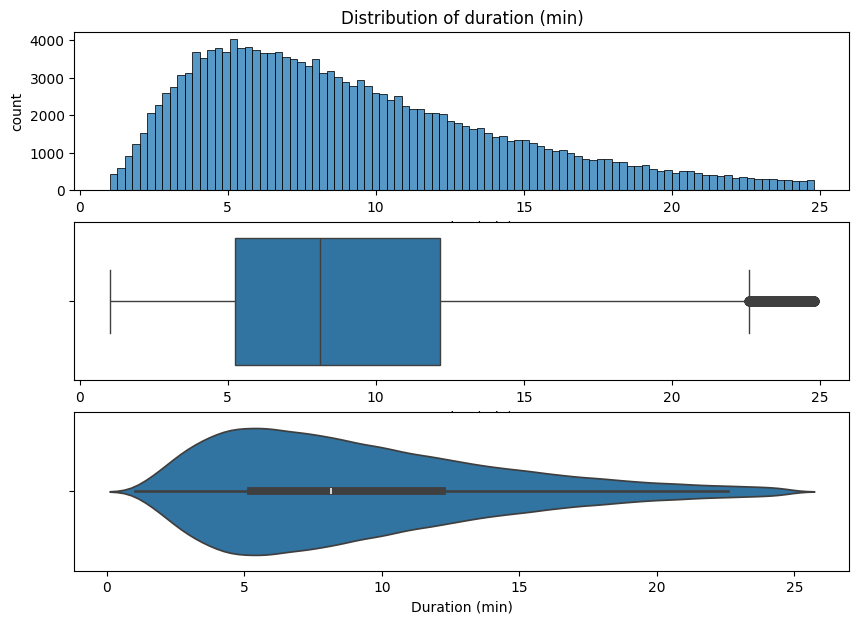

In [120]:
df["duration_min"] = df["duration_sec"]/60
violin_hist_box("duration_min" , df , "Distribution of duration (min)" , "Duration (min)" , "count")

1. we know that most of duration in minute is between 3 to 10 minutes
2. So that range is 24 minutes and IQR is 7 minutes with mean 9 minutes and median 8 minutes

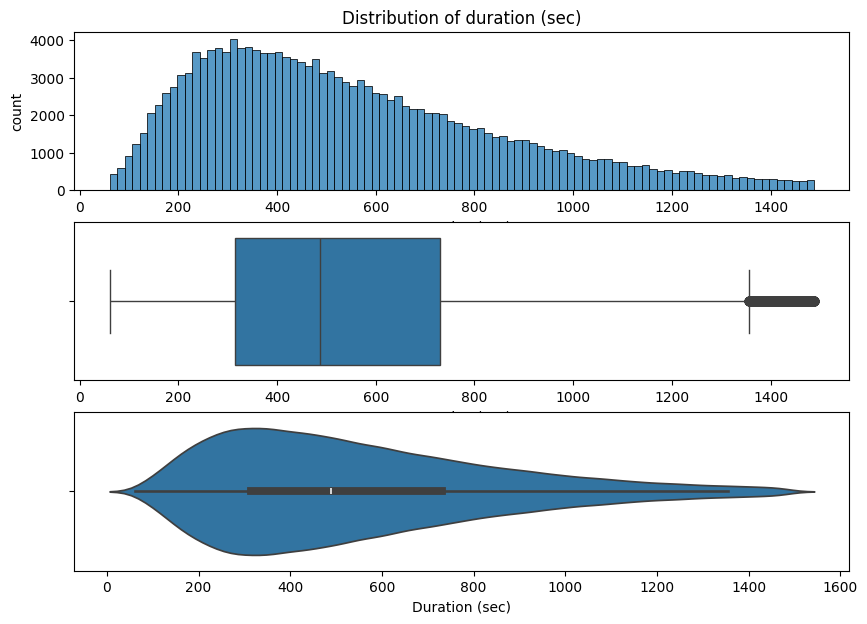

In [121]:
violin_hist_box("duration_sec" , df , "Distribution of duration (sec)","Duration (sec)" , "count")

In [122]:
number_high_outliers = maximum_outlier(df ,"duration_min").shape[0]
number_low_outliers = minmum_outlier(df ,"duration_min").shape[0]
print(f"Numer of outliers more than Upper limit {number_high_outliers}")
print(f"Numer of outliers lower than lower limit {number_low_outliers}")
# Numer of outliers more than Upper limit and Numer of outliers lower than lower limit

Numer of outliers more than Upper limit 9328
Numer of outliers lower than lower limit 0


#### What is percentage of bikes which share in subscriber and customer 

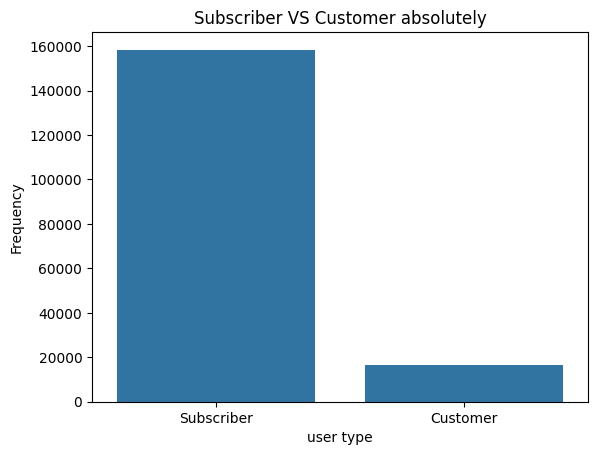

In [123]:
bar_absolute("user_type" , "Subscriber VS Customer absolutely" , "user type" , "Frequency")

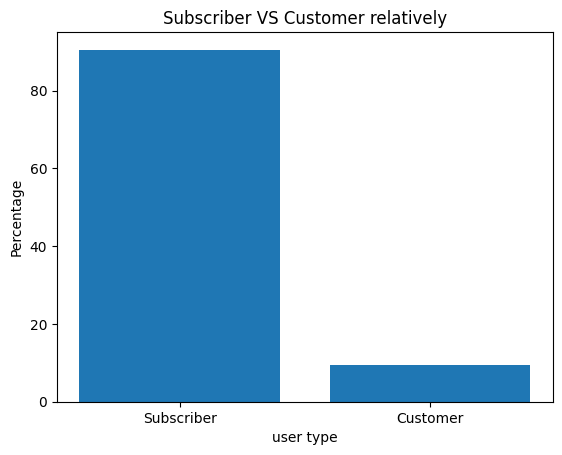

In [124]:
bar_relative("user_type" , "Subscriber VS Customer relatively","user type" , "Percentage")

we found that about subscribers are more than 80% and customer lower than 29%

#### What is percentage of bikes which share in all trip

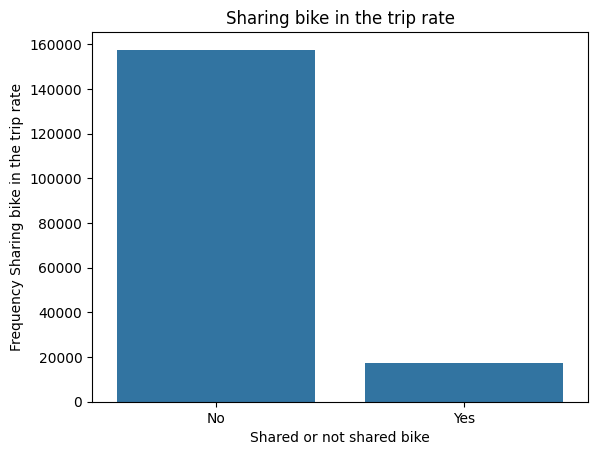

In [125]:
bar_absolute("bike_share_for_all_trip", "Sharing bike in the trip rate","Shared or not shared bike", "Frequency Sharing bike in the trip rate")

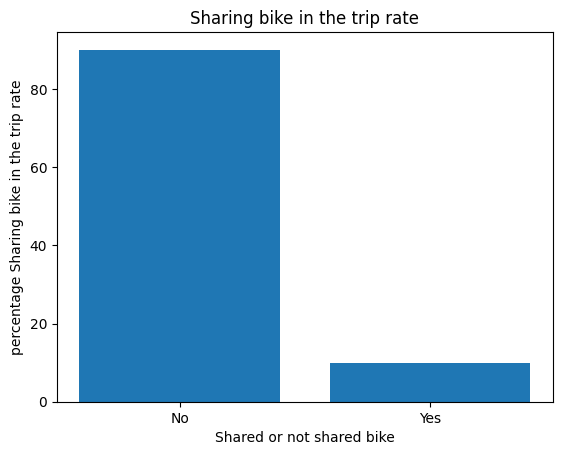

In [126]:
bar_relative("bike_share_for_all_trip", "Sharing bike in the trip rate","Shared or not shared bike", "percentage Sharing bike in the trip rate")

About more than 80% bike do not share for all the trip and less than 20% shared for the whole trip

#### What are percentages of member genders

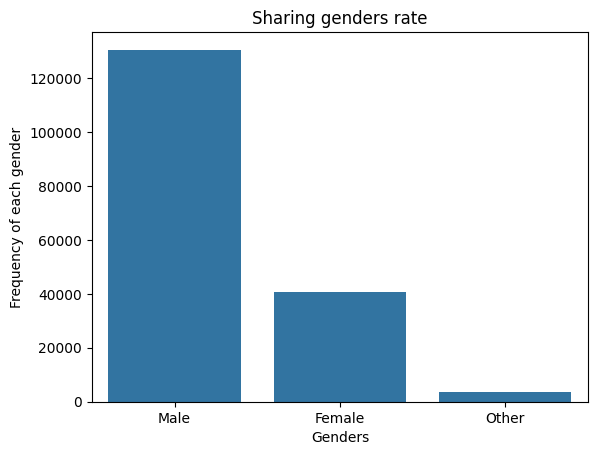

In [127]:
bar_absolute("member_gender", "Sharing genders rate", "Genders" , "Frequency of each gender")

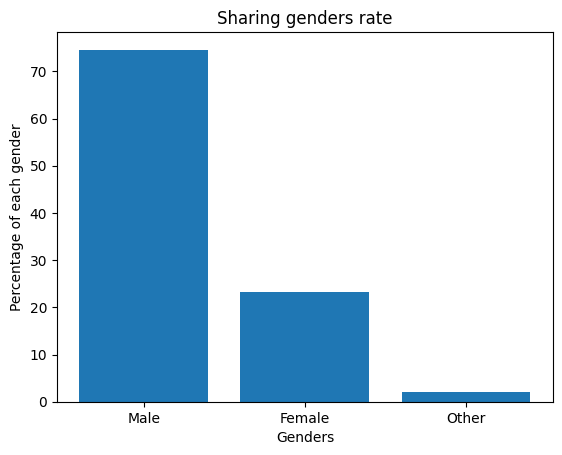

In [128]:
bar_relative("member_gender", "Sharing genders rate","Genders" , "Percentage of each gender")

more than 70% of customers are males 
more than 20% of customers are females 

#### What is the distribution of Displacement 

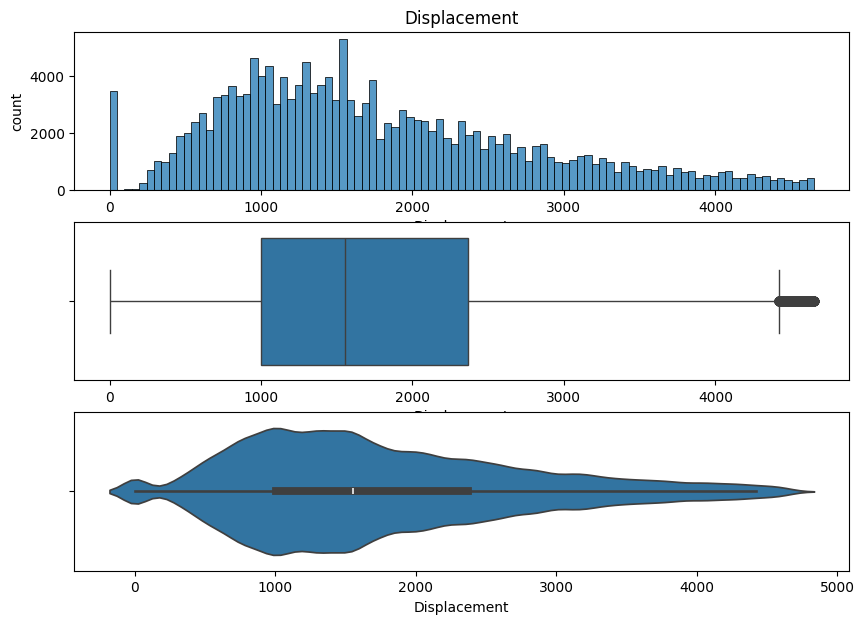

In [129]:
violin_hist_box("Displacement" , df , "Displacement" , "Displacement" , "count")

1. The range of distance covered by bike is 4650 and IQR is 1364 
2. It is right skewed 
3. the mean is 1761 and the median is 1554

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of data with right skewed with high outliers so I made function to remove outliers and applied ot while i plot univariate

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes i made some new columns like displacemwnt and age yes i changed form of some data like birth year to date , lattitude and longtitude to int to get the difference and convert to displacemnet 
i divided people into 4 categories adult , kid , old , teenager to determine the market

## Bivariate Exploration

#### The biggest market user_type vs member_gender

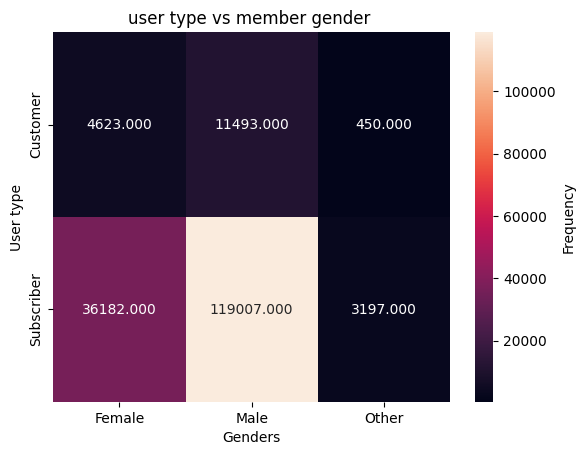

In [130]:
heat_map("user_type" , "member_gender" , "user type vs member gender " , "Genders" , "User type")

The arrangement of market from greatest to lowest are the male subscribers, female subscribers then male customers 

#### member_gender vs categoris age

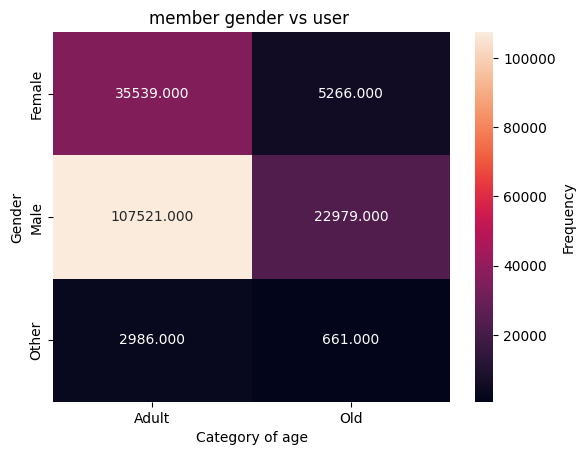

In [131]:
heat_map("member_gender" , "user" , "member gender vs user " ,"Category of age" , "Gender")

The biggest market is Make adult then female adult

#### Distribution of age according to Gender

C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


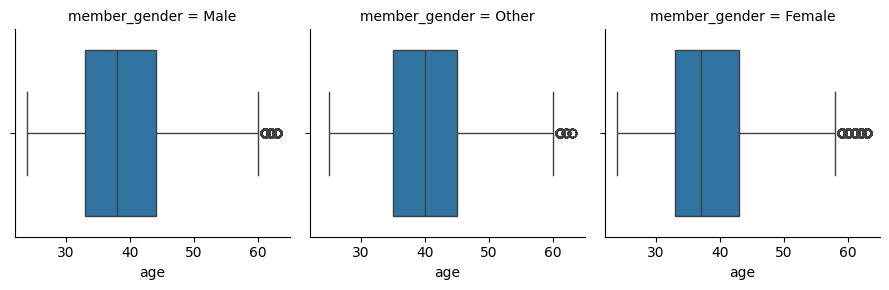

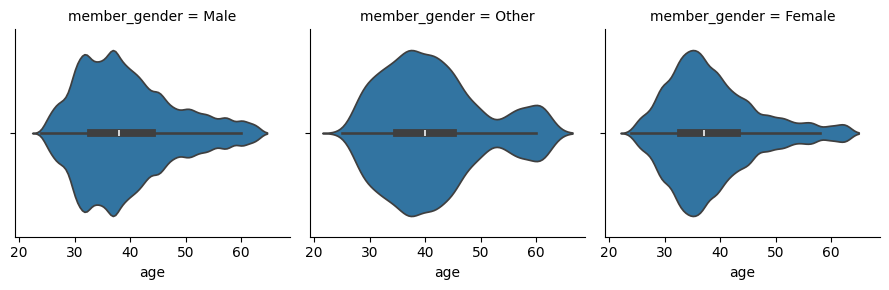

In [132]:
facet(df, "member_gender" , "age"  ,"age", "Member")

The highest market are people between 30 and 45 in males and females

C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


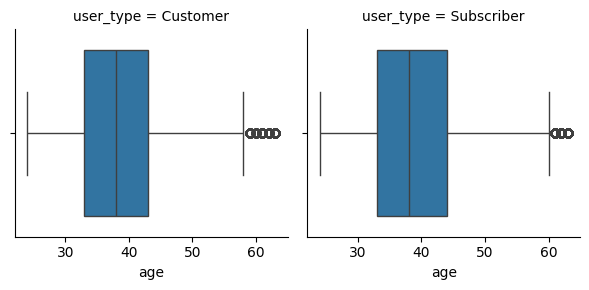

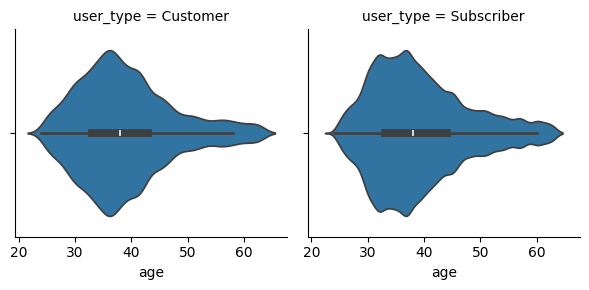

In [133]:
facet(df,"user_type" ,"age" , "age" , "Distribution")

Most of customers and subscriber are between 30 and 40 years

#### How do stations appear on map far from each other

Text(0.5, 1.0, 'cordinates of stations')

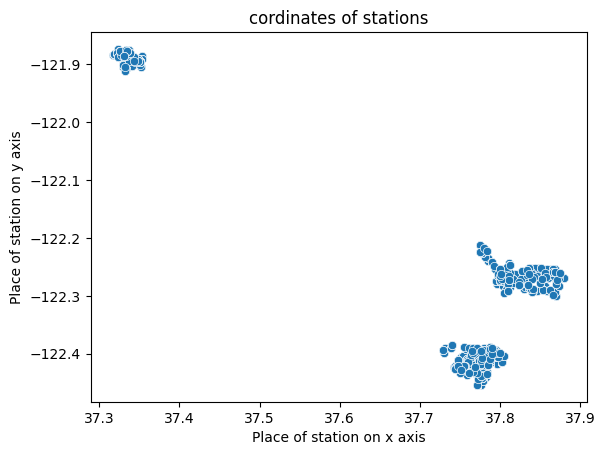

In [134]:
sns.scatterplot(data = df , x = "start_station_latitude" , y ="start_station_longitude")
plt.xlabel("Place of station on x axis")
plt.ylabel("Place of station on y axis")
plt.title("cordinates of stations")

there main four places where station are concentrated

#### If there are specific bikes are token for long time

Text(0.5, 1.0, 'Time each bike was taken')

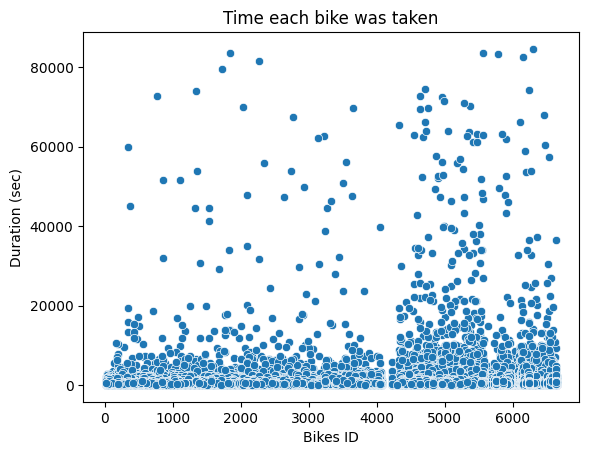

In [135]:
sns.scatterplot(data = df , x="bike_id" , y ="duration_sec")
plt.xlabel("Bikes ID")
plt.ylabel("Duration (sec)")
plt.title("Time each bike was taken")

there are some bikes which are taken for long time. they must have something specific for it

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The arrangement of market from greatest to lowest are the male subscribers, female subscribers then male customers
>  The biggest market is Make adult then female adult
> there main four places where station are concentrated
> The highest market are people between 30 and 45 in males and females

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> yes the age of age categories , member gender and user type according to more encodings

## Multivariate Exploration

#### Matrix of variables

Text(0.5, 1.0, 'Heat map coleration between vars')

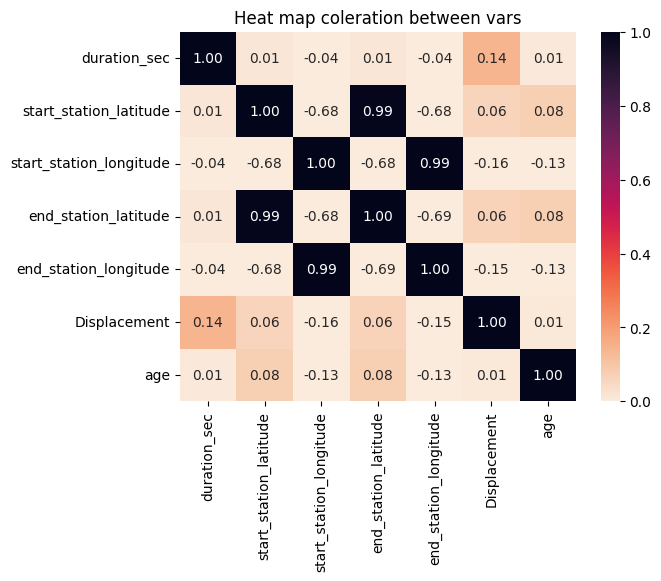

In [136]:

sns.heatmap(df[["duration_sec" , 'start_station_latitude','start_station_longitude' , 'end_station_latitude', 'end_station_longitude','Displacement', 'age' ]].corr(), cmap='rocket_r', annot=True,fmt='.2f', vmin=0,);
plt.title("Heat map coleration between vars")

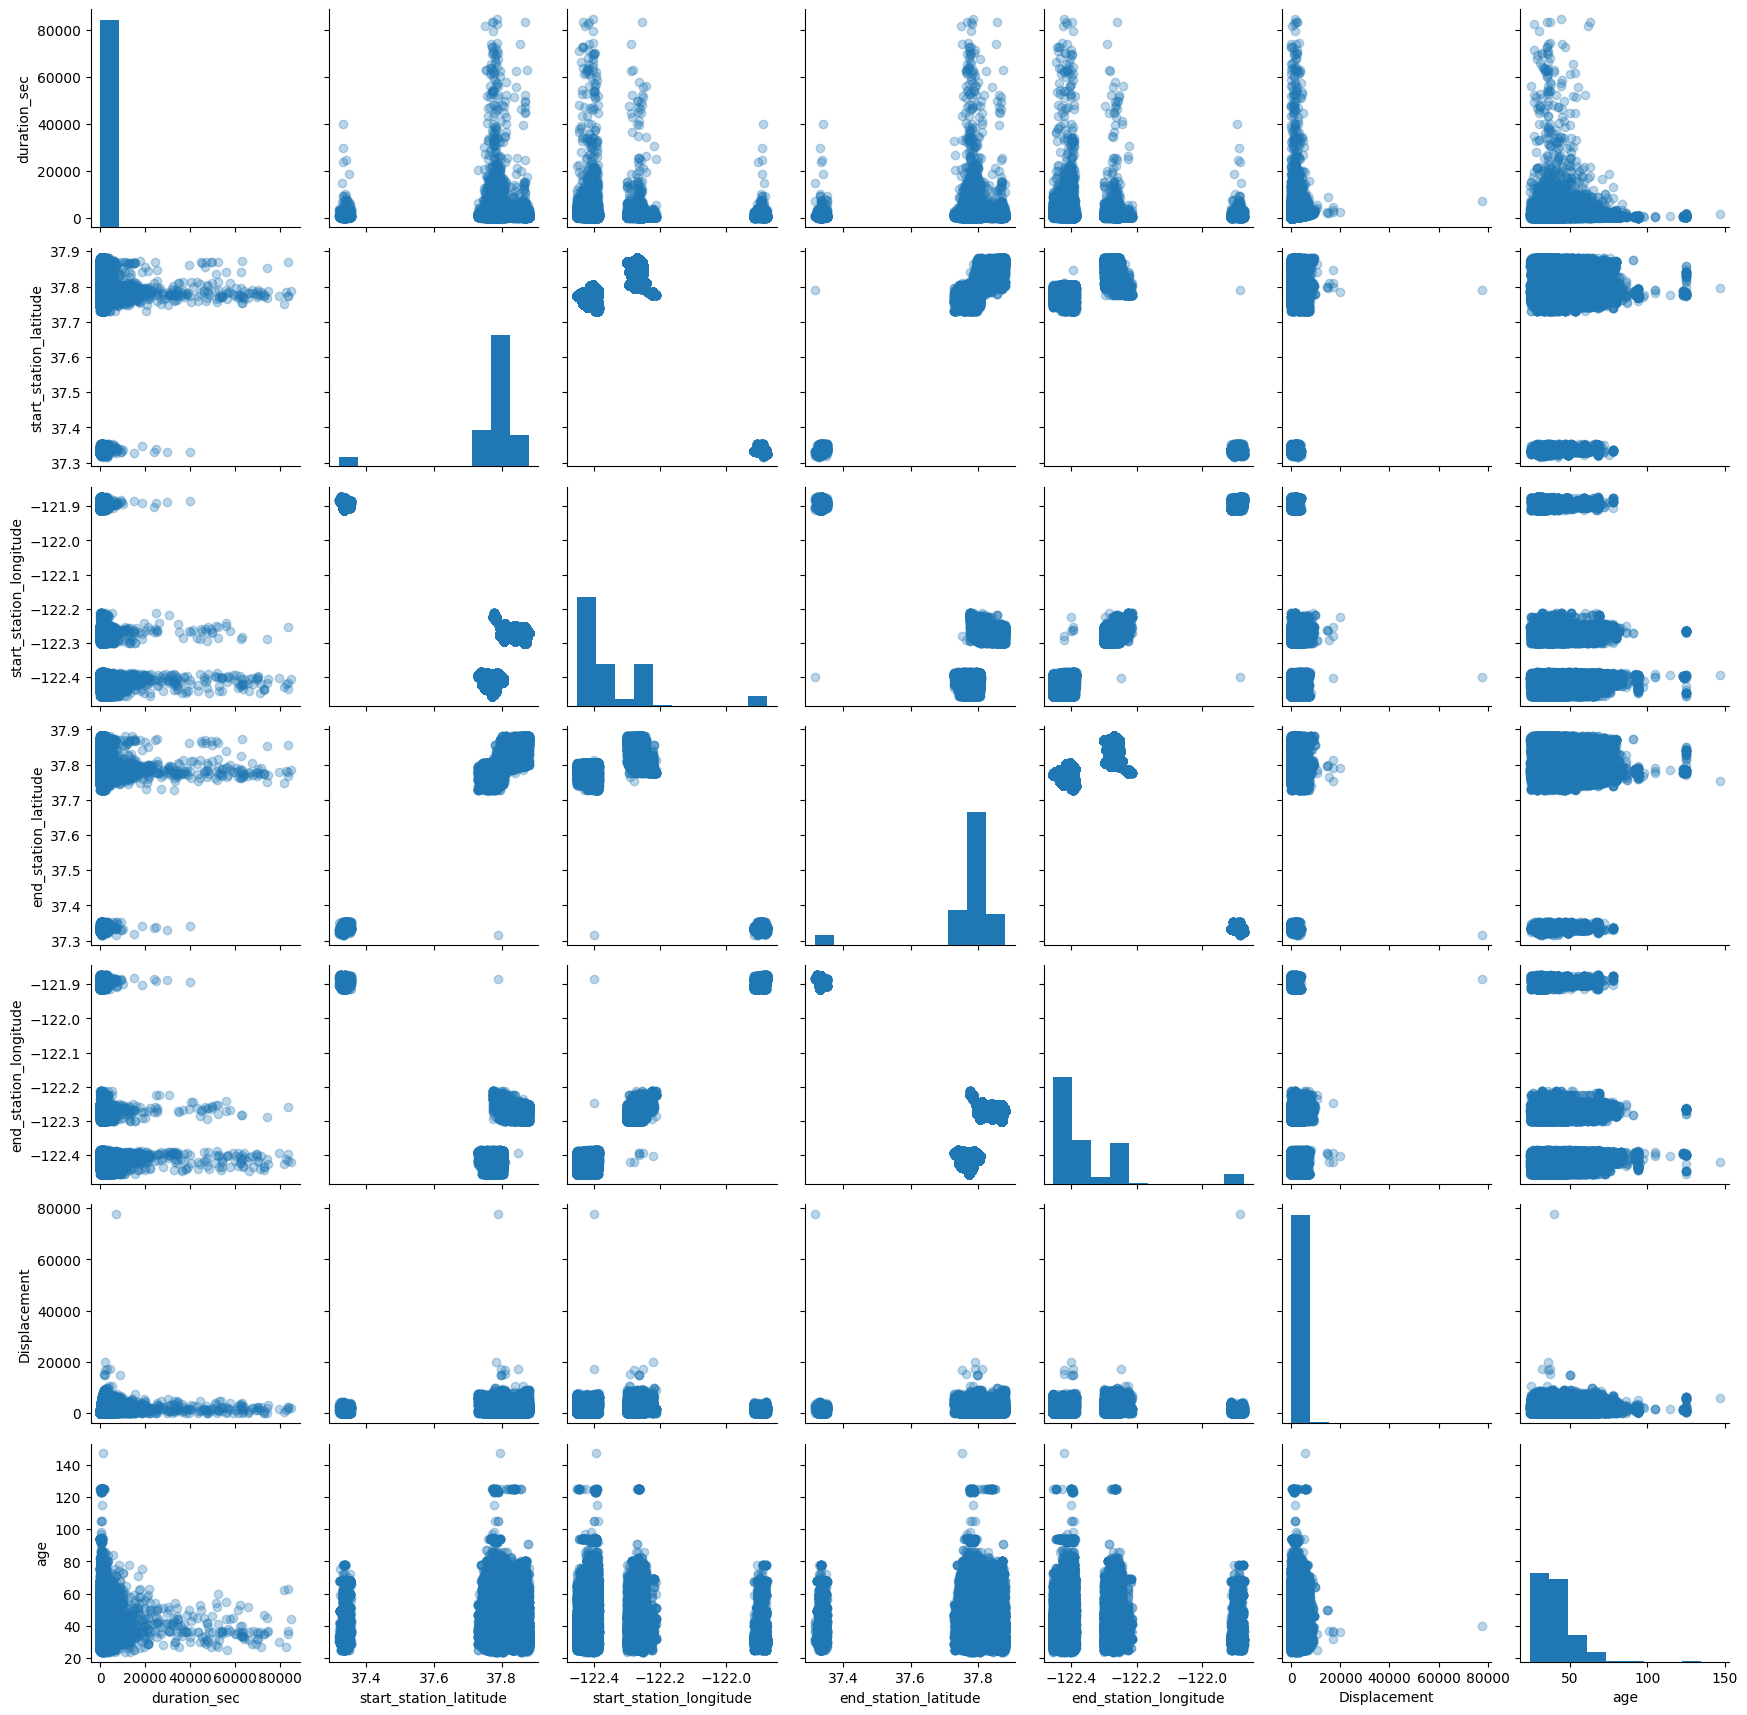

In [137]:
g = sns.PairGrid(data=df, vars= ["duration_sec" , 'start_station_latitude','start_station_longitude' , 'end_station_latitude', 'end_station_longitude','Displacement', 'age' ]);
g.map_offdiag(plt.scatter , alpha=0.3);
g.map_diag(plt.hist);

#### Are there amy cantegories complete whole trip more than who do not complete

C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


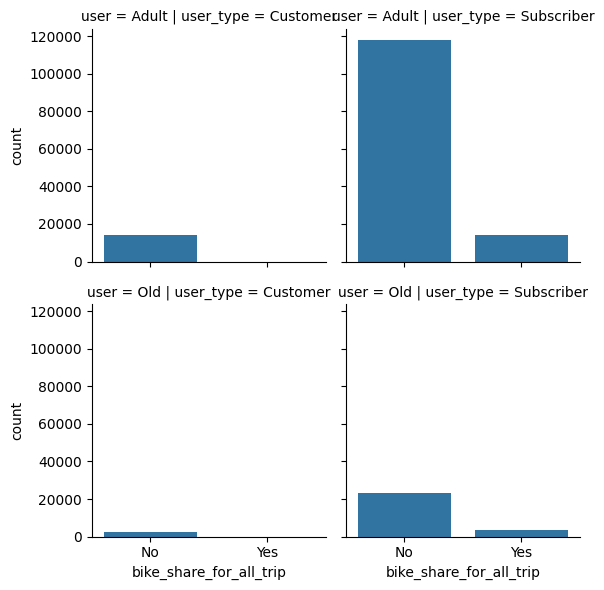

In [138]:
g = sns.FacetGrid(df, col="user_type" , row = "user")
g.map(sns.countplot, "bike_share_for_all_trip")
#Trying to find category which use bikes to complete full trip


All adults and olds males and females do not complete whole trip

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the correlation between numerical values are very low

### Were there any interesting or surprising interactions between features?

> no there are not any thing strange

## Conclusions
> **Rubric Requirement**: taking a look to understand the dataset remove any nans for luck there werenot duplicates then asking about distribution of some numerical data and developing new columns from old columns like age and displacement thentrying to ask some question and finding the relation between two variable the best finding is the category which use bikes alot then trying to find relation between three categories it was hard to find any relation so i plot heat map with correlation between variables there were not so i tried to make hist plot by three categories 

> **Rubric Requirement**: 
1. we know that most of duration in minute is between 3 to 10 minutes So that range is 24 minutes and IQR is 7 minutes with mean 9 minutes and median 8 minutes
2. we found that about subscribers are more than 80% and customer lower than 29%
3. About more than 80% bike do not share for all the trip and less than 20% shared for the whole trip
5. The range of distance covered by bike is 4650 m and IQR is 1364 m and the mean is 1761 m and the median is 1554 m
6. The arrangement of market from greatest to lowest are the male subscribers, female subscribers then male customers 
7. The biggest market is Make adult then female adult
9. The highest market are people between 30 and 45 years males and females
10. Most of customers and subscriber are between 30 and 45 years
11. there main four places where station are concentrated
12. there are some bikes which are taken for long time. they must have something specific for it
13. All adults and olds males and females do not complete whole trip